# Data Visualizations Page
Notebook for plotting. The rows had to be scaled down to 750,000 in order to conserve time.


# 1. Data Preprocessing
The dataset has 2,815,677 rows

3.8 million rows with 55 columns. Please use an appropriate sample size before plotting. <br>
I will first need to transform some of the integer-like categorical values. The keys are located in 'US_Birth_columns' text file. <br>
In addition, I will need to engineer new variables to better enhance the R2 score.

### Libraries to import:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LassoCV
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.feature_selection import SelectKBest, f_regression, mutual_info_regression
from scipy import stats
%matplotlib inline
import random
pd.set_option('display.max_columns',500)
pd.set_option('display.max_rows',500)

### Import Data:

In [2]:
columns = ['dob_mm', 'dob_tt', 'dob_wk', 'bfacil', 'mager', 'mbstate_rec', 'restatus', 'mrace6', 'mhisp_r', 'mracehisp', 'dmar', 'meduc', 'fagecomb',
          'frace6', 'fhisp_r', 'fracehisp', 'feduc', 'priorlive', 'priordead', 'priorterm', 'illb_r', 'ilop_r', 'ilp_r', 'precare', 'previs', 'cig_0',
          'cig_1', 'cig_2', 'cig_3', 'm_ht_in', 'f_m_ht', 'bmi', 'pwgt_r', 'dwgt_r', 'wtgain', 'rf_pdiab', 'rf_gdiab', 'rf_phype', 'rf_ghype', 'rf_ehype',
          'rf_ppterm', 'rf_inftr', 'rf_fedrg', 'rf_artec', 'rf_cesar', 'rf_cesarn', 'no_risks', 'ip_gon', 'ip_syph', 'ip_chlam', 'ip_hepatb', 'ip_hepatc', 
          'no_infec', 'ob_ecvs', 'ob_ecvf', 'ld_indl', 'ld_augm', 'ld_ster', 'ld_antb', 'ld_chor', 'ld_anes', 'no_lbrdlv', 'me_pres', 'me_rout', 'me_trial',
          'rdmeth_rec', 'mm_mtr', 'mm_plac', 'mm_rupt', 'mm_uhyst', 'mm_aicu', 'no_mmorb', 'attend', 'mtran', 'pay', 'dplural', 'sex', 'combgest', 'oegest_comb',
          'dbwt']

In [3]:
n = 3_801_534
s = 750_000
skip = sorted(random.sample(range(1, n + 1), n-s))

In [4]:
df = pd.read_csv('natl2018.csv.zip', low_memory=False, usecols=columns, skiprows=skip)
# df = df.sample(n=250_000, random_state=42)
df.shape

(750000, 80)

In [5]:
df.head()

,dob_mm,dob_tt,dob_wk,bfacil,mager,mbstate_rec,restatus,mrace6,mhisp_r,mracehisp,dmar,meduc,fagecomb,frace6,fhisp_r,fracehisp,feduc,priorlive,priordead,priorterm,illb_r,ilop_r,ilp_r,precare,previs,cig_0,cig_1,cig_2,cig_3,m_ht_in,f_m_ht,bmi,pwgt_r,dwgt_r,wtgain,rf_pdiab,rf_gdiab,rf_phype,rf_ghype,rf_ehype,rf_ppterm,rf_inftr,rf_fedrg,rf_artec,rf_cesar,rf_cesarn,no_risks,ip_gon,ip_syph,ip_chlam,ip_hepatb,ip_hepatc,no_infec,ob_ecvs,ob_ecvf,ld_indl,ld_augm,ld_ster,ld_antb,ld_chor,ld_anes,no_lbrdlv,me_pres,me_rout,me_trial,rdmeth_rec,mm_mtr,mm_plac,mm_rupt,mm_uhyst,mm_aicu,no_mmorb,attend,mtran,pay,dplural,sex,combgest,oegest_comb,dbwt
0,1,830,3,1,37,1,1,10,0,1,1.0,4,35,2,0,2,3,1,0,4,999,999,999,5,15,0,0,0,0,66,1,35.5,220,219,0,N,N,N,N,N,N,N,X,X,N,0,1,N,N,N,N,N,1,N,N,N,N,N,N,N,Y,0,1,4,N,3,N,N,N,N,N,1,1,N,1,1,M,37,37,2125
1,1,341,3,1,28,1,1,10,0,1,1.0,4,25,1,0,1,6,2,0,0,27,888,27,3,6,0,0,0,0,70,1,23.0,160,170,10,N,N,N,N,N,N,N,X,X,N,0,1,N,N,N,N,N,1,N,N,Y,N,N,N,N,Y,0,1,1,X,1,N,N,N,N,N,1,1,N,5,1,F,40,39,3180
2,1,1754,5,1,37,2,1,10,0,1,1.0,2,42,1,0,1,4,2,0,0,67,888,67,2,14,0,0,0,0,62,1,24.7,135,155,20,N,Y,N,N,N,N,N,X,X,Y,2,0,N,N,N,N,N,1,N,N,N,N,N,N,N,N,1,1,4,N,4,N,N,N,N,N,1,1,N,2,1,F,42,40,3700
3,1,155,7,1,25,1,2,10,0,1,1.0,4,26,1,0,1,4,2,0,1,24,51,24,2,9,0,0,0,0,63,1,25.7,145,201,56,N,N,N,N,N,N,N,X,X,N,0,1,N,N,N,N,N,1,N,N,N,N,N,N,N,Y,0,1,1,X,1,N,N,N,N,N,1,1,N,1,1,M,39,39,4130
4,1,841,4,1,30,2,1,10,0,1,1.0,5,31,1,0,1,4,1,0,0,37,888,37,3,10,0,0,0,0,58,1,31.3,150,180,30,N,N,N,N,N,N,N,X,X,Y,1,0,N,N,N,N,N,1,N,N,N,N,N,N,N,Y,0,1,4,N,4,N,N,N,N,N,1,1,N,5,1,F,39,39,3810


In [6]:
def data_cleaning_births(_df):
    """
    Preprocessing columns by translating using column dictionary.
    The order of columns follows the same order as column dictionary.
    """
    
    # Birth Month, leave numbers as is; 12 = December, 01 = January
    _df['dob_mm'] = _df['dob_mm'] 
    
    
    # Time of Birth, dropping unknown
    _df.drop(df[df['dob_tt'].eq(9999)].index, inplace=True)    
    
    
    # Birth Day of Week, leave as is; 7 = Saturday, 1 = Sunday
    _df['dob_wk'] = _df['dob_wk']
    
    # Birth Place; Home(intended) = Home(not intended)
    conditions = [
        _df['bfacil'].eq(1),
        _df['bfacil'].eq(2),
        _df['bfacil'].eq(3),
        _df['bfacil'].eq(4), 
        _df['bfacil'].eq(5),
        _df['bfacil'].eq(6),
        _df['bfacil'].eq(7), 
    ]
    choices = [
        'Hospital',
        'BirthCenter',
        'Home',
        'Home',
        'Home',
        'Clinic',
        'Other'
    ]
    _df['bfacil'] = np.select(conditions, choices, 'Unknown')
    
    # Mother's Single Years of Age; note 0 = 10-12, and 50 = 50 and over
    _df['mager'] = _df['mager']
    
    # Mother's Nativity
    conditions = [
        _df['mbstate_rec'].eq(1),
        _df['mbstate_rec'].eq(2)
    ]
    choices = [
        'BornInUSA',
        'BornOutUSA'
    ]
    _df['mbstate_rec'] = np.select(conditions, choices, 'Unknown')
    
    
    # Residence Status
    conditions = [
        _df['restatus'].eq(1),
        _df['restatus'].eq(2),
        _df['restatus'].eq(3)
    ]
    choices = [
        'Resident',
        'IntrastateNonresident',
        'InterstateNonresident'
    ]
    _df['restatus'] = np.select(conditions, choices, 'Foreign')
    
    # Mother's Race Recode 6
    conditions = [
        _df['mrace6'].eq(10),
        _df['mrace6'].eq(20),
        _df['mrace6'].eq(30),
        _df['mrace6'].eq(41),
        _df['mrace6'].eq(51)
    ]
    choices = [
        'White',
        'Black',
        'AIAN',
        'Asian',
        'NHOPI',
    ]
    
    _df['mrace6'] = np.select(conditions, choices, 'Multi')
    
    # Mother's Hispanic Origin
    conditions = [
        _df['mhisp_r'].eq(0),
        _df['mhisp_r'].eq(1),
        _df['mhisp_r'].eq(2),
        _df['mhisp_r'].eq(3),
        _df['mhisp_r'].eq(4),
        _df['mhisp_r'].eq(5),
        _df['mhisp_r'].eq(6)
    ]
    choices = [
        'Non-Hispanic',
        'Mexican',
        'Puerto Rican',
        'Cuban',
        'CentralSouthAmerican',
        'OtherHispanic',
        'Dominican'
    ]
    _df['mhisp_r'] = np.select(conditions, choices, 'Unknown')
    
    # Mother's Race/Hispanic Origin
    conditions = [
        _df['mracehisp'].eq(1),
        _df['mracehisp'].eq(2),
        _df['mracehisp'].eq(3),
        _df['mracehisp'].eq(4),
        _df['mracehisp'].eq(5),
        _df['mracehisp'].eq(6),
        _df['mracehisp'].eq(7),
    ]
    choices = [
        'NonHispanicWhite',
        'NonHispanicBlack',
        'NonHispanicAIAN',
        'NonHispanicAsian',
        'NonHispanicNHOPI',
        'NonHispanicMulti',
        'Hispanic'
    ]
    _df['mracehisp'] = np.select(conditions, choices, 'Unknown')
    
    
    # Marital Status
    _df['dmar'] = np.where(_df['dmar'].eq(1), 'Married', 'Unmarried')
    
    # Mother's Education
    conditions = [
        _df['meduc'].eq(1),
        _df['meduc'].eq(2),
        _df['meduc'].eq(3),
        _df['meduc'].eq(4),
        _df['meduc'].eq(5),
        _df['meduc'].eq(6),
        _df['meduc'].eq(7),
        _df['meduc'].eq(8)
    ]
    choices = [
        'JuniorHighIncomplete',
        'HighSchoolIncomplete',
        'HighSchoolComplete',
        'CollegeIncomplete',
        'AssociateDegree',
        'BachelorDegree',
        'MasterDegree',
        'Doctorate'
    ]
    _df['meduc'] = np.select(conditions, choices, 'Unknown')
    
    # Father's combined Age: imputing missing fathers age with average
    _df['fagecomb'] = np.where(_df['fagecomb'].eq(99), 30, _df['fagecomb'])
    
    # Father's Race recode
    conditions = [
        _df['frace6'].eq(1),
        _df['frace6'].eq(2),
        _df['frace6'].eq(3),
        _df['frace6'].eq(4),
        _df['frace6'].eq(5),
        _df['frace6'].eq(6),
    ]
    choices = [
        'White',
        'Black',
        'AIAN',
        'Asian',
        'NHOPI',
        'Multi'
    ]
    _df['frace6'] = np.select(conditions, choices, 'Unknown')
    
    # Father's Hispanic Origin
    conditions = [
        _df['fhisp_r'].eq(0),
        _df['fhisp_r'].eq(1),
        _df['fhisp_r'].eq(2),
        _df['fhisp_r'].eq(3),
        _df['fhisp_r'].eq(4),
        _df['fhisp_r'].eq(5),
        _df['fhisp_r'].eq(6)
    ]
    choices = [
        'NonHispanic',
        'Mexican',
        'PuertoRican',
        'Cuban',
        'CentralSouthAmerican',
        'Dominican',
        'OtherHispanic'
    ]
    _df['fhisp_r'] = np.select(conditions, choices, 'Unknown')
    
    # Father's Race/Hispanic Origin
    conditions = [
        _df['fracehisp'].eq(1),
        _df['fracehisp'].eq(2),
        _df['fracehisp'].eq(3),
        _df['fracehisp'].eq(4),
        _df['fracehisp'].eq(5),
        _df['fracehisp'].eq(6),
        _df['fracehisp'].eq(7),
        _df['fracehisp'].eq(8)
    ]
    choices = [
        'NonHispanicWhite',
        'NonHispanicBlack',
        'NonHispanicAIAN',
        'NonHispanicAsian',
        'NonHispanicNHOPI',
        'NonHispanicMulti',
        'Hispanic',
        'Unknown'
    ]
    _df['fracehisp'] = np.select(conditions, choices, 'Unknown')
    
    # Father's Education
    conditions = [
        _df['feduc'].eq(1),
        _df['feduc'].eq(2),
        _df['feduc'].eq(3),
        _df['feduc'].eq(4),
        _df['feduc'].eq(5),
        _df['feduc'].eq(6),
        _df['feduc'].eq(7),
        _df['feduc'].eq(8)
    ]
    choices = [
        'JuniorHighIncomplete',
        'HighSchoolIncomplete',
        'HighSchoolComplete',
        'CollegeIncomplete',
        'AssociateDegree',
        'BachelorDegree',
        'MasterDegree',
        'Doctorate'
    ]
    _df['feduc'] = np.select(conditions, choices, 'Unknown')
    
    # Prior Births Now Living
    conditions = [
        _df['priorlive'].eq(0),
        _df['priorlive'].eq(1),
        _df['priorlive'].eq(99)
    ]
    choices = [
        'None',
        'One',
        'Unknown'
    ]
    _df['priorlive'] = np.select(conditions, choices, 'Multi')
    
    # Prior Births Now Dead
    conditions = [
        _df['priordead'].eq(0),
        _df['priordead'].eq(1),
        _df['priordead'].eq(99)
    ]
    choices = [
        'None',
        'One',
        'Unknown'
    ]
    _df['priordead'] = np.select(conditions, choices, 'Multi')
    
    # Prior Other Terminations
    conditions = [
        _df['priorterm'].eq(0),
        _df['priorterm'].eq(1),
        _df['priorterm'].eq(99)
    ]
    choices = [
        'None',
        'One',
        'Unknown'
    ]
    _df['priorterm'] = np.select(conditions, choices, 'Multi')
    
    
    # Interval Since Last Live Birth Recode
    _df.drop(df[df['illb_r'].eq(999)].index, inplace=True)    
    _df['illb_r'] = np.where(_df['illb_r'].eq(888), 0, _df['illb_r'])
    
    # Interval since last other Pregnancy
    _df.drop(df[df['ilop_r'].eq(999)].index, inplace=True)    
    _df['ilop_r'] = np.where(_df['ilop_r'].eq(888), 0, _df['ilop_r'])
    
    # Interval since Last pregnancy
    _df.drop(df[df['ilp_r'].eq(999)].index, inplace=True)    
    _df['ilp_r'] = np.where(_df['ilp_r'].eq(888), 0, _df['ilp_r'])
    
    # Month Prenatal Care Began
    _df['precare'] = np.where(_df['precare'].eq(99), 0, _df['precare'])
    
    # Number of Prenatal Visits
    _df['previs'] = np.where(_df['previs'].eq(99), 0, _df['previs'])
    
    # Cigarettes before Pregnancy
    conditions = [
        _df['cig_0'].eq(0),
        _df['cig_0'].eq(99)
    ]
    choices = [
        'None',
        'Unknown'
    ]
    _df['cig_0'] = np.select(conditions, choices, 'Yes')
    
    # Cigarettes 1st Trimester
    conditions = [
        _df['cig_1'].eq(0),
        _df['cig_1'].eq(99)
    ]
    choices = [
        'None',
        'Unknown'
    ]
    _df['cig_1'] = np.select(conditions, choices, 'Yes')
    
    # Cigarettes 2nd Trimester
    conditions = [
        _df['cig_2'].eq(0),
        _df['cig_2'].eq(99)
    ]
    choices = [
        'None',
        'Unknown'
    ]
    _df['cig_2'] = np.select(conditions, choices, 'Yes')
    
    # Cigarettes 3rd Trimester
    conditions = [
        _df['cig_3'].eq(0),
        _df['cig_3'].eq(99)
    ]
    choices = [
        'None',
        'Unknown'
    ]
    _df['cig_3'] = np.select(conditions, choices, 'Yes')
    
    
    # Mother's Height in Total Inches: imputing average height if missing
    _df['m_ht_in'] = np.where(_df['m_ht_in'].eq(99), 64, _df['m_ht_in'])
    
    # Height Reported
    _df['f_m_ht'] = _df['f_m_ht']
    
    
    # Body Mass Index: if missing, impute mean
    _df['bmi'] = np.where(_df['bmi'].eq(99), 27.9, _df['bmi'])
    
    # Pre-pregnancy weight
    _df['pwgt_r'] = np.where(_df['pwgt_r'].eq(999), 164, _df['pwgt_r'])
    
    
    # Delivery Weight Recode
    _df['dwgt_r'] = np.where(_df['dwgt_r'].eq(999), 193, _df['dwgt_r'])
    
    
    # Weight Gain
    _df['wtgain'] = np.where(_df['wtgain'].eq(99), _df['dwgt_r'] - _df['pwgt_r'], _df['wtgain'])
    
    # Pre-pregnancy Diabetes
    # .... skipping columns leaving as is. Y = Yes, N= No, U = Unknown, X = Not Applicable
    # Previous Cesarean
    
    # Number of Previous Cesareans
    conditions = [
        _df['rf_cesarn'].eq(0),
        _df['rf_cesarn'].eq(1),
        _df['rf_cesarn'].eq(99),
    ]
    choices = [
        'None',
        'One',
        'Unknown'
    ]
    _df['rf_cesarn'] = np.select(conditions, choices, 'Multi')
    
    
    # No Risk Factors Reported
    conditions = [
        _df['no_risks'].eq(1),
        _df['no_risks'].eq(0)
    ]
    choices = [
        'Y',
        'N'
    ]
    _df['no_risks'] = np.select(conditions, choices, 'U')
    
    # IP_GON Gonorrhea
    # ... skipping columns, leaving as is. Y= Yes, N= No, U= Unknown
    # IP_HEPC Hepatitis c
    
    # No Infections Reported
    conditions = [
        _df['no_infec'].eq(1),
        _df['no_infec'].eq(0)
    ]
    choices = [
        'Y',
        'N'
    ]
    _df['no_infec'] = np.select(conditions, choices, 'U')
    
    # OB_ECVS Successful External Cephalic Version
    # ... skipping columns
    # LD_ANES Anesthesia
    
    # No Characteristics of Labor Reported
    conditions = [
        _df['no_lbrdlv'].eq(1),
        _df['no_lbrdlv'].eq(0)
    ]
    choices = [
        'Y',
        'N'
    ]
    _df['no_lbrdlv'] = np.select(conditions, choices, 'U')
    
    
    # Fetal Presentation at Delivery
    conditions = [
        _df['me_pres'].eq(1),
        _df['me_pres'].eq(2),
        _df['me_pres'].eq(3)
    ]
    choices = [
        'Cephalic',
        'Breech',
        'Other'
    ]
    _df['me_pres'] = np.select(conditions, choices, 'Unknown')
    
    
    # Final Route and Method of Delivery
    conditions = [
        _df['me_rout'].eq(1),
        _df['me_rout'].eq(2),
        _df['me_rout'].eq(3),
        _df['me_rout'].eq(4)
    ]
    choices = [
        'Spontaneous',
        'Forceps',
        'Vacuum',
        'Cesarean'
    ]
    _df['me_rout'] = np.select(conditions, choices, 'Unknown')
    
    # Trial of Labor Attempted
    # skip
    
    # Delivery Method Recode
    conditions = [
        _df['rdmeth_rec'].eq(1),
        _df['rdmeth_rec'].eq(2),
        _df['rdmeth_rec'].eq(3),
        _df['rdmeth_rec'].eq(4),
        _df['rdmeth_rec'].eq(5),
        _df['rdmeth_rec'].eq(6)
    ]
    choices = [
        'Vaginal',
        'VaginalAfterCSection',
        'PrimaryCSection',
        'RepeatCSection',
        'Vaginal',
        'PrimaryCSection'
    ]
    _df['rdmeth_rec'] = np.select(conditions, choices, 'Unknown')
    
    # Maternal Transfusion
    # skip
    # Admit to Intensive Care
    
    # No Maternal Morbidty Reported
    conditions = [
        _df['no_mmorb'].eq(1),
        _df['no_mmorb'].eq(0),
    ]
    choices = [
        'Yes',
        'No'
    ]
    _df['no_mmorb'] = np.select(conditions, choices, 'Unknown')
    
    # Attendant at Birth
    conditions = [
        _df['attend'].eq(1),
        _df['attend'].eq(2),
        _df['attend'].eq(3),
        _df['attend'].eq(4),
        _df['attend'].eq(5)
    ]
    choices = [
        'DoctorMedicine',
        'DoctorOsteopathy',
        'NurseMidwife',
        'OtherMidwife',
        'Other'
    ]
    _df['attend'] = np.select(conditions, choices, 'Unknown')
    
    
    # Mother Transferred
    # skip
    
    # Payment Source for Delivery
    conditions = [
        _df['pay'].eq(1),
        _df['pay'].eq(2),
        _df['pay'].eq(3),
        _df['pay'].eq(4),
        _df['pay'].eq(5),
        _df['pay'].eq(6),
        _df['pay'].eq(8),
    ]
    choices = [
        'Medicaid',
        'PrivateInsurance',
        'SelfPay',
        'IndianHealthService',
        'Tricare',
        'OtherGovernment',
        'Other'
    ]
    _df['pay'] = np.select(conditions, choices, 'Unknown')
    
    
    # Plurality Recode
    # skip
    
    # Sex of Infant
    #skip
    
    # Combined Gestation
    _df['combgest'] = np.where(_df['combgest'].eq(99), 38, _df['combgest'])
    
    # Obstetric Estimate
    _df['oegest_comb'] = np.where(_df['oegest_comb'].eq(99), 38, _df['oegest_comb'])
    
    # Birth Weight
    _df.drop(df[df['dbwt'].eq(9999)].index, inplace=True)
    
    
    return _df

In [7]:
df = data_cleaning_births(df)

In [8]:
mu = df['dbwt'].mean()
median = df['dbwt'].median()
std = df['dbwt'].std()

In [9]:
textstr = r'$\mu=%.2f$' % (mu, )

In [10]:
textstr = 'mu = {:.2f} \nmedian = {:.2f} \nstd = {:.2f}'.format(mu, median, std)
textstr

'mu = 3267.97 \nmedian = 3310.00 \nstd = 585.05'

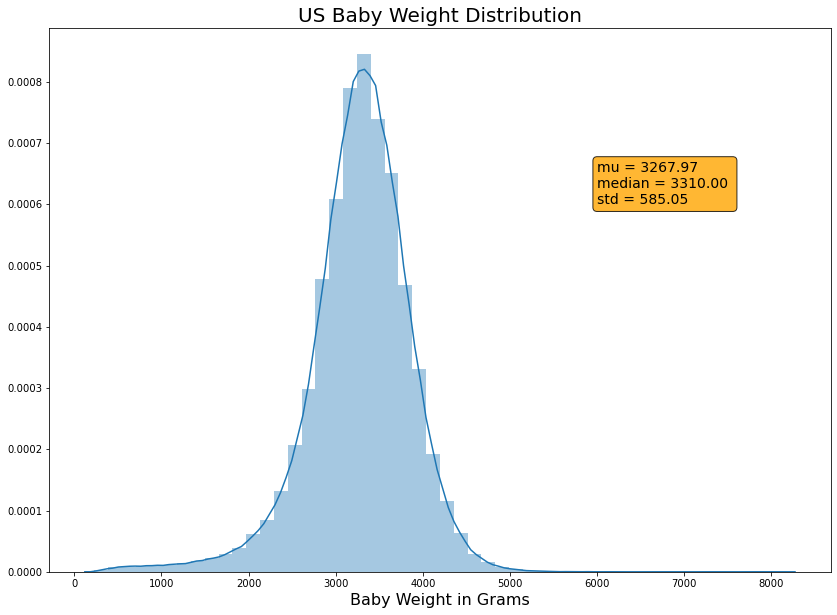

In [11]:
plt.figure(figsize=(14,10))
g = sns.distplot(df['dbwt'])
g.set_xlabel('Baby Weight in Grams', fontsize=16)
g.set_title('US Baby Weight Distribution', fontsize=20)
mu = df['dbwt'].mean()
median = df['dbwt'].median()
std = df['dbwt'].std()

props = dict(boxstyle='round', facecolor='orange', alpha = 0.8)
g.text(6000, 0.0006, textstr, fontsize=14, bbox=props)
plt.savefig('WeightDistribution', bbox_inches = 'tight', pad_inches=0.5);

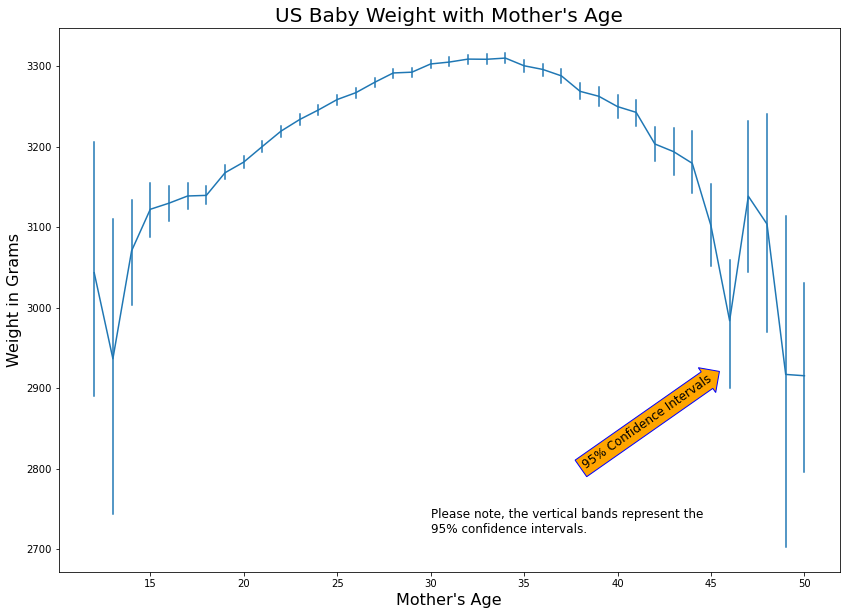

In [12]:
plt.figure(figsize=(14,10))
g=sns.lineplot(x = 'mager', y = 'dbwt', data=df, markers = True, err_style='bars', ci = 95)
g.set_ylabel('Weight in Grams', fontsize=16)
g.set_xlabel('Mother\'s Age', fontsize=16)
g.set_title('US Baby Weight with Mother\'s Age', fontsize=20)

g.text(38, 2800, '95% Confidence Intervals', rotation = 35, size=12, bbox = dict(boxstyle='rarrow', pad=0.3, fc='orange', ec='b'))
g.text(30, 2720, 'Please note, the vertical bands represent the \n95% confidence intervals.', size= 12)
plt.savefig('WeightAge', bbox_inches = 'tight', pad_inches=0.5);

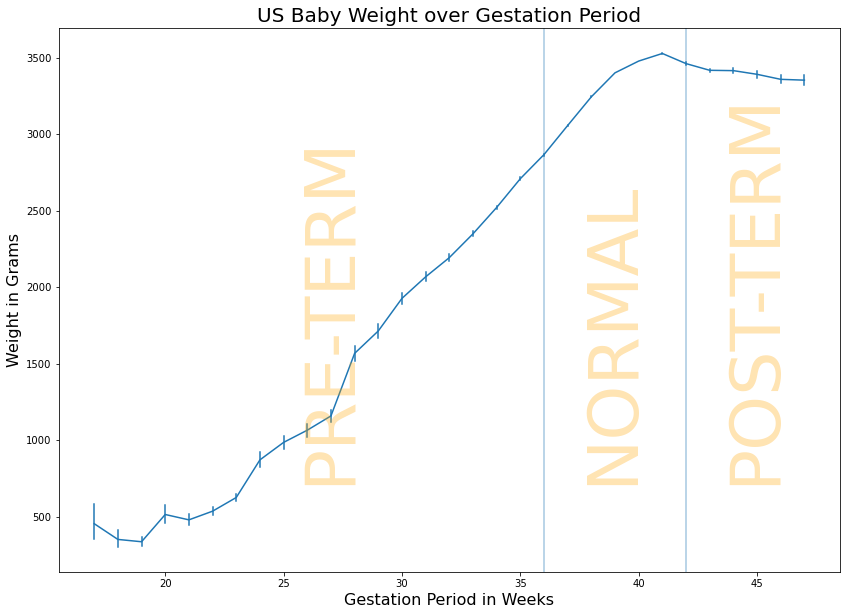

In [13]:
plt.figure(figsize=(14,10))
g=sns.lineplot(x = 'combgest', y = 'dbwt', data=df, markers = True, err_style='bars', ci = 95)
g.set_xlabel('Gestation Period in Weeks', fontsize=16)
g.set_ylabel('Weight in Grams', fontsize= 16)
g.set_title('US Baby Weight over Gestation Period', fontsize=20)

g.axvline(36, alpha=0.4)
g.axvline(42, alpha=0.4)
g.annotate('NORMAL', xy = (37.5, 800), xytext = (37.5,800), fontsize=70, rotation = 90, alpha = 0.3, color = 'orange')
g.annotate('POST-TERM', xy = (43.5, 800), xytext = (43.5,800), fontsize=70, rotation = 90, alpha = 0.3, color = 'orange')
g.annotate('PRE-TERM', xy = (25.5, 800), xytext = (25.5,800), fontsize=70, rotation = 90, alpha = 0.3, color = 'orange')
plt.savefig('WeightGest', bbox_inches = 'tight', pad_inches=0.5);